In [1]:
import bagpy
from bagpy import bagreader
import matplotlib.pyplot as plt
import pandas as pd

/home/safwan/virenv/base3.8/lib/python3.8/site-packages/bagpy/bagreader.py:121: UserWarning: There is a newer version of bagpy available on PyPI:

Your version: 	
0.4.5
Latest version: 	
0.4.6
Consider updating it by using command pip install --upgrade bagpy
  warnings.warn("{}\n{}\n{}\n{}\n{}\n{}".format(


In [2]:
file_path = '/home/safwan/Documents/shared_files/cyverse/2T3W1RFV0MC103811/bagfiles/2021_07_14/2021_07_14_16_15_31_2T3W1RFV0MC103811following_real_vehicle_micromodel_margin.bag'
b = bagreader(file_path)

[INFO]  Successfully created the data folder /home/safwan/Documents/shared_files/cyverse/2T3W1RFV0MC103811/bagfiles/2021_07_14/2021_07_14_16_15_31_2T3W1RFV0MC103811following_real_vehicle_micromodel_margin.


In [3]:
filename = file_path.split('/')[-1]

In [4]:
b.topic_table

Topics                       Types  Message Count  \
0                 /accel            std_msgs/Float64          17538   
1             /cmd_accel            std_msgs/Float64          17469   
2               /cmd_vel         geometry_msgs/Twist           3504   
3              /commands            std_msgs/Float64          17549   
4   /effective_lead_dist            std_msgs/Float64           3498   
5             /highbeams            std_msgs/Float64            176   
6             /lead_dist            std_msgs/Float64           1754   
7               /rel_vel         geometry_msgs/Twist           2003   
8                /rosout           rosgraph_msgs/Log             12   
9            /rosout_agg           rosgraph_msgs/Log             18   
10       /steering_angle            std_msgs/Float64          17562   
11             /track_a0  geometry_msgs/PointStamped           3515   
12             /track_a1  geometry_msgs/PointStamped           3517   
13            /track_a10  geometry_msgs/PointStamped           3513   
14            /track_a11  geometry_msgs/PointStamped           3513   
15            /track_a12  geometry_msgs/PointStamped           3510   
16            /track_a13  geometry_msgs/PointStamped           3510   
17            /track_a14  geometry_msgs/PointStamped           3510   
18            /track_a15  geometry_msgs/PointStamped           3508   
19             /track_a2  geometry_msgs/PointStamped           3515   
20             /track_a3  geometry_msgs/PointStamped           3515   
21             /track_a4  geometry_msgs/PointStamped           3515   
22             /track_a5  geometry_msgs/PointStamped           3515   
23             /track_a6  geometry_msgs/PointStamped           3515   
24             /track_a7  geometry_msgs/PointStamped           3515   
25             /track_a8  geometry_msgs/PointStamped           3517   
26             /track_a9  geometry_msgs/PointStamped           3517   
27                /v_des         geometry_msgs/Twist           3504   
28               /v_des2         geometry_msgs/Twist           3508   
29                  /vel         geometry_msgs/Twist           8774   

       Frequency  
0     181.650238  
1     299.925203  
2      19.984296  
3     100.025136  
4      19.953778  
5       0.999919  
6      61.668245  
7      20.217118  
8   14563.555556  
9   19328.589862  
10    100.751958  
11     19.996586  
12     19.976063  
13     20.000591  
14     19.990773  
15     19.982487  
16     19.990773  
17     19.983820  
18     19.985438  
19     20.003071  
20     19.976967  
21     19.984915  
22     19.971687  
23     19.996872  
24     20.000305  
25     20.003453  
26     20.004598  
27     19.989344  
28     19.984010  
29     50.086026

In [5]:
CMD_ACC_MSG = b.message_by_topic('/cmd_accel') #commanded accel
ACC_MSG = b.message_by_topic('/accel') # car accel
CMD_VEL = b.message_by_topic('/cmd_vel')
LEAD_DIST = b.message_by_topic('/lead_dist') #lead dist
VEL_MSG = b.message_by_topic('/vel') # velocty 
V_DES = b.message_by_topic('/v_des')
V_DES2 = b.message_by_topic('/v_des2')
EFF_LEAD_DIST = b.message_by_topic('/effective_lead_dist')

In [6]:
df_cacc = pd.read_csv(CMD_ACC_MSG)
df_acc = pd.read_csv(ACC_MSG)
# df_gvel = pd.read_csv(GHOST_VEL_MSG)
df_lead_dist = pd.read_csv(LEAD_DIST)
df_vel = pd.read_csv(VEL_MSG)
df_v_des = pd.read_csv(V_DES)
df_v_des2 = pd.read_csv(V_DES2)
df_cmd_vel = pd.read_csv(CMD_VEL)
df_eff_lead_dist = pd.read_csv(EFF_LEAD_DIST)
t0 = df_vel['Time'][0]

In [7]:
# df_cmd_vel

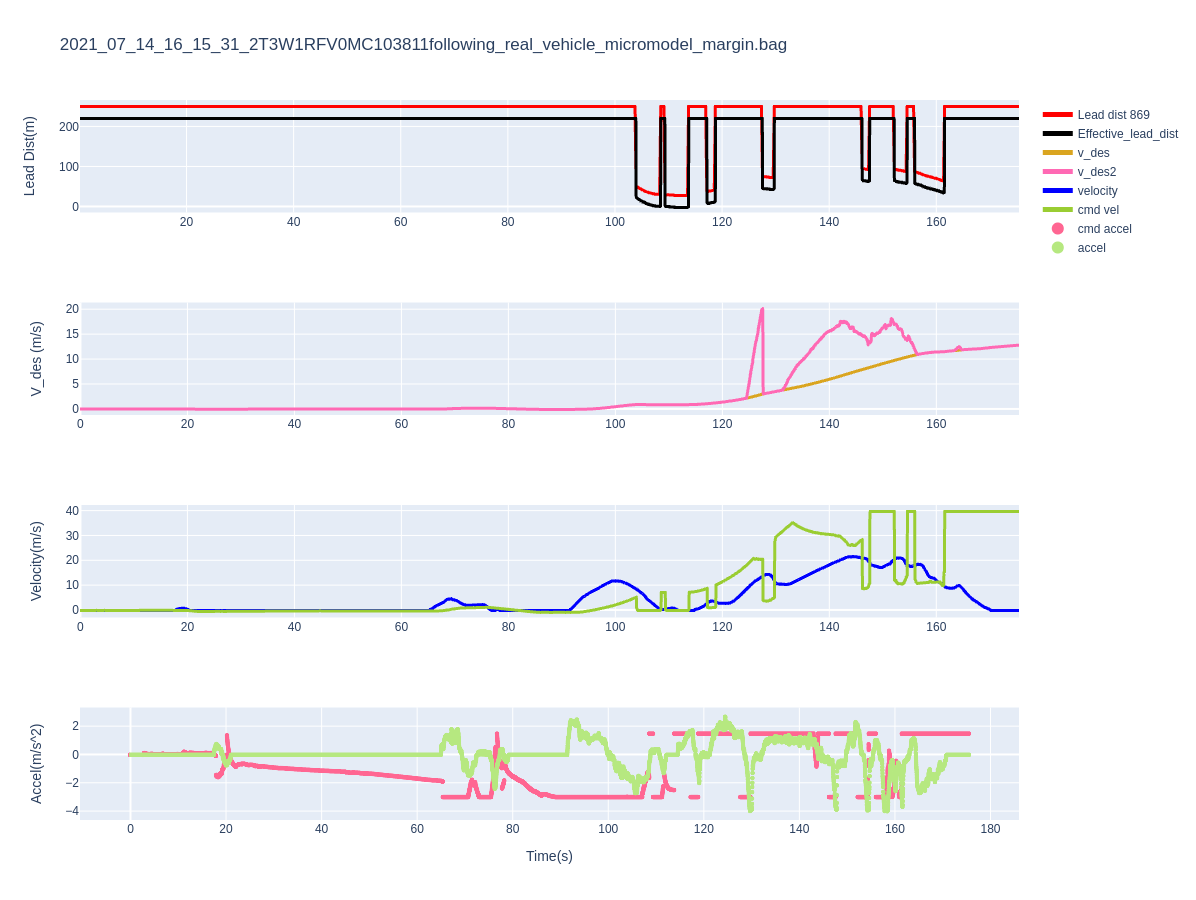

In [8]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
figr = make_subplots(rows=4, cols=1, subplot_titles=("", ""))

figr.append_trace(go.Scattergl(
    x=df_lead_dist['Time']-t0,
    y=df_lead_dist['data'],
     name="Lead dist 869",
      line=dict(
        width=3,
          color="red",
     ),
), row=1, col=1)

figr.append_trace(go.Scattergl(
    x=df_eff_lead_dist['Time']-t0,
    y=df_eff_lead_dist['data'],
     name="Effective_lead_dist",
      line=dict(
        width=3,
          color="black",
     ),
), row=1, col=1)

figr.append_trace(go.Scattergl(
    x=df_v_des['Time']-t0,
    y=df_v_des['linear.x'],
     name="v_des",
      line=dict(
        width=3,
          color="goldenrod",
     ),
), row=2, col=1)

figr.append_trace(go.Scattergl(
    x=df_v_des2['Time']-t0,
    y=df_v_des2['linear.x'],
     name="v_des2",
      line=dict(
        width=3,
          color="hotpink",
     ),
), row=2, col=1)



figr.append_trace(go.Scattergl(
    x=df_vel['Time']-t0,
    y=df_vel['linear.x'],
          line=dict(
        width=3,
          color="blue",
     ),
    name="velocity",
), row=3, col=1)

figr.append_trace(go.Scattergl(
    x=df_cmd_vel['Time']-t0,
    y=df_cmd_vel['linear.x'],
          line=dict(
        width=3,
          color="yellowgreen",
     ),
    name="cmd vel",
), row=3, col=1)


figr.append_trace(go.Scattergl(
    x=df_cacc['Time']-t0, 
#     y=speed_msg2["twist.linear.x"],
    y=df_cacc['data'],
       mode='markers',
          marker=dict(
            size=5,
          ),
    name="cmd accel",
), row=4, col=1)
figr.append_trace(go.Scattergl(
    x=df_acc['Time']-t0, 
#     y=speed_msg2["twist.linear.x"],
    y=df_acc['data'],
       mode='markers',
          marker=dict(
            size=5,
          ),
    name="accel",
), row=4, col=1)

figr.update_xaxes(title_text="Time(s)", row=4, col=1)

figr.update_yaxes(title_text="Lead Dist(m)", row=1, col=1)
figr.update_yaxes(title_text="V_des (m/s)", row=2, col=1)
figr.update_yaxes(title_text="Velocity(m/s)", row=3, col=1)
figr.update_yaxes(title_text="Accel(m/s^2)", row=4, col=1)




figr.update_layout(height=900, width=800, legend = {'itemsizing': 'constant'} ,title_text=filename)
figr.show()